# Read the data and prepare multiple time series

The method of choice is the analysis givven in [1] for time series' in a high dimensional space. In order to be able to process the data we have 



[1] C. Uhl, Analyse raumzeitlicher Daten strukturbildender Systeme, Verlag Shaker (1995)

Still to be found:
[]  K. Karhunen, "Zur Spektraltheorie stochastischer Prozesse," Ann. Acad. Sci. Fenn. A1, Math. Phys. 37 (1946)
 M. Loeve, “Fonctions aleatoires de second ordre,” Comptes Rendus De L'Académie Des Sciences, vol. 220, (1945).

### Load the respective libraries

In [1]:
from bs4 import BeautifulSoup
import csv
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

### Get the data

In [2]:
filenameC='time_series_covid19_confirmed_global.csv'
filenameD='time_series_covid19_deaths_global.csv'
filenameR='time_series_covid19_recovered_global.csv'
#htmlC = open("TableC.html").read()
htmlC = open(filenameC).read()
soupC = BeautifulSoup(htmlC)
TableC = soupC.find("table")
htmlD = open(filenameD).read()
soupD = BeautifulSoup(htmlD)
TableD = soupD.find("table")
htmlR = open(filenameR).read()
soupR = BeautifulSoup(htmlR)
TableR = soupR.find("table")

### Extract the header row from TableC/D/R, read data from the table and create a dictionary with all countries and the total of confirmed cases

In [3]:
# Some data of Johns Hopkins lacks the last entry being empty 
# and resulting in error of int(x)
def tryint(x):
    try:
        y=np.array([int(x[i]) for i in np.arange(len(x))])
    except ValueError:
        x[-1]=x[-2]
        y=np.array([int(x[i]) for i in np.arange(len(x))])
    return y
# TableC
# Header row
TableC_headrow= TableC.find('tr')
hcolumns = TableC_headrow.findAll('th')
output_row = []
output_rows = []
for column in hcolumns: output_row.append(column.text)
output_rows.append(output_row)
# Table
for TableC_row in TableC.findAll('tr'):
    columns = TableC_row.findAll('td')
    output_row = []
    for column in columns:
        output_row.append(column.text)
    if len(output_row) > 1: output_rows.append(output_row)
# Dictionary
yC={}
for i in np.arange(1,len(output_rows)):
    key=output_rows[i][2]
    x=output_rows[i][5:]
    if key in yC: 
        yC[key]=yC[key]+tryint(x)
    else:
        yC[key]=tryint(x)
# The following should be the same for all three
x=np.arange(len(yC.get('Germany')))
# TableD
# Header row
TableD_headrow= TableD.find('tr')
hcolumns = TableD_headrow.findAll('th')
output_row = []
output_rows = []
for column in hcolumns: output_row.append(column.text)
output_rows.append(output_row)
# Table
for TableD_row in TableD.findAll('tr'):
    columns = TableD_row.findAll('td')
    output_row = []
    for column in columns:
        output_row.append(column.text)
    if len(output_row) > 1: output_rows.append(output_row)
# Dictionary
yD={}
for i in np.arange(1,len(output_rows)):
    key=output_rows[i][2]
    x=output_rows[i][5:]
    if key in yD: 
        yD[key]=yD[key]+tryint(x)
    else:
        yD[key]=tryint(x)
# TableR
# Header row
TableR_headrow= TableR.find('tr')
hcolumns = TableR_headrow.findAll('th')
output_row = []
output_rows = []
for column in hcolumns: output_row.append(column.text)
output_rows.append(output_row)
# Table
for TableR_row in TableR.findAll('tr'):
    columns = TableR_row.findAll('td')
    output_row = []
    for column in columns:
        output_row.append(column.text)
    if len(output_row) > 1: output_rows.append(output_row)
# Dictionary
yR={}
for i in np.arange(1,len(output_rows)):
    key=output_rows[i][2]
    x=output_rows[i][5:]
    if key in yR: 
        yR[key]=yR[key]+tryint(x)
    else:
        yR[key]=tryint(x)
#
# Temporarily suppressed
# Caution the following is only for logarithmic representation
# ylog=y.copy()
# for key in y.keys():
#    ylog[key]=np.log10(ylog[key]+1)
#
# numerical ordering of countries NOT USED YES
# numbered=dict(zip(np.arange(len(y.keys())),y.keys()))

### Define plotting functions for the data retrieved, linear plot and log plot

In [4]:
numbered=dict(zip(yC.keys(),np.arange(len(yC.keys()))))
def plotcountry(y,Country,istart,loglin):
    fig, ax = plt.subplots()
    for c in Country: 
        i=numbered[c]
        x=np.arange(len(y.get(c)[istart:]))
        if loglin==False: ax.plot(x[istart:],y.get(c)[istart:],label=c)
        if loglin==True: ax.plot(x[istart:],np.log10(1+y.get(c)[istart:]),label=c)
    legend = ax.legend(loc='upper left', shadow=True, fontsize='x-large')
    #legend.get_frame().set_facecolor('C0')
    #plt.show()

### Plot choices of data

<IPython.core.display.Javascript object>


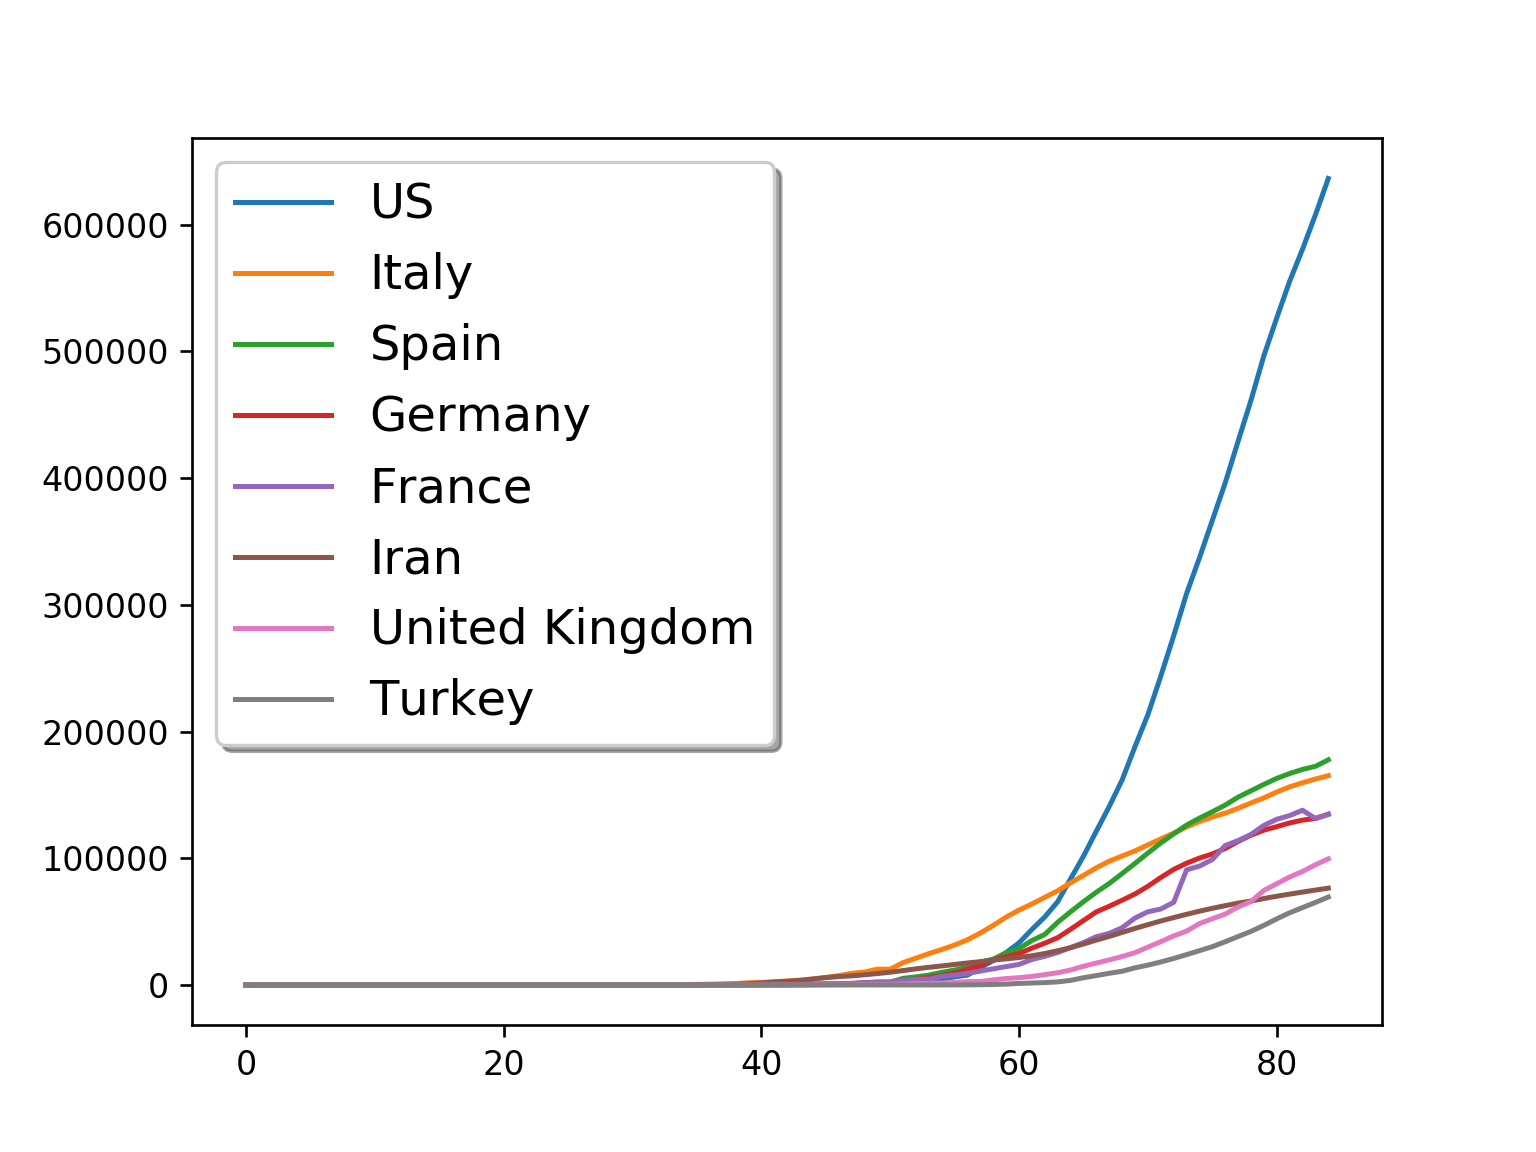

In [5]:
%matplotlib notebook
#del y['China']
#plotcountry(['Korea, South'],0)
countries=['US','Italy','Spain','Germany','France','Iran','United Kingdom','Turkey']
plotcountry(yC,countries,0,False)

### Fit data to a simple exponential 

In [6]:
# Maybe some day we need this
# 
#
# Define the model function $e^{a\cdot (x-x_0)}$
def model(x,a,x0):
    return np.exp(a*(x-x0))

<IPython.core.display.Javascript object>


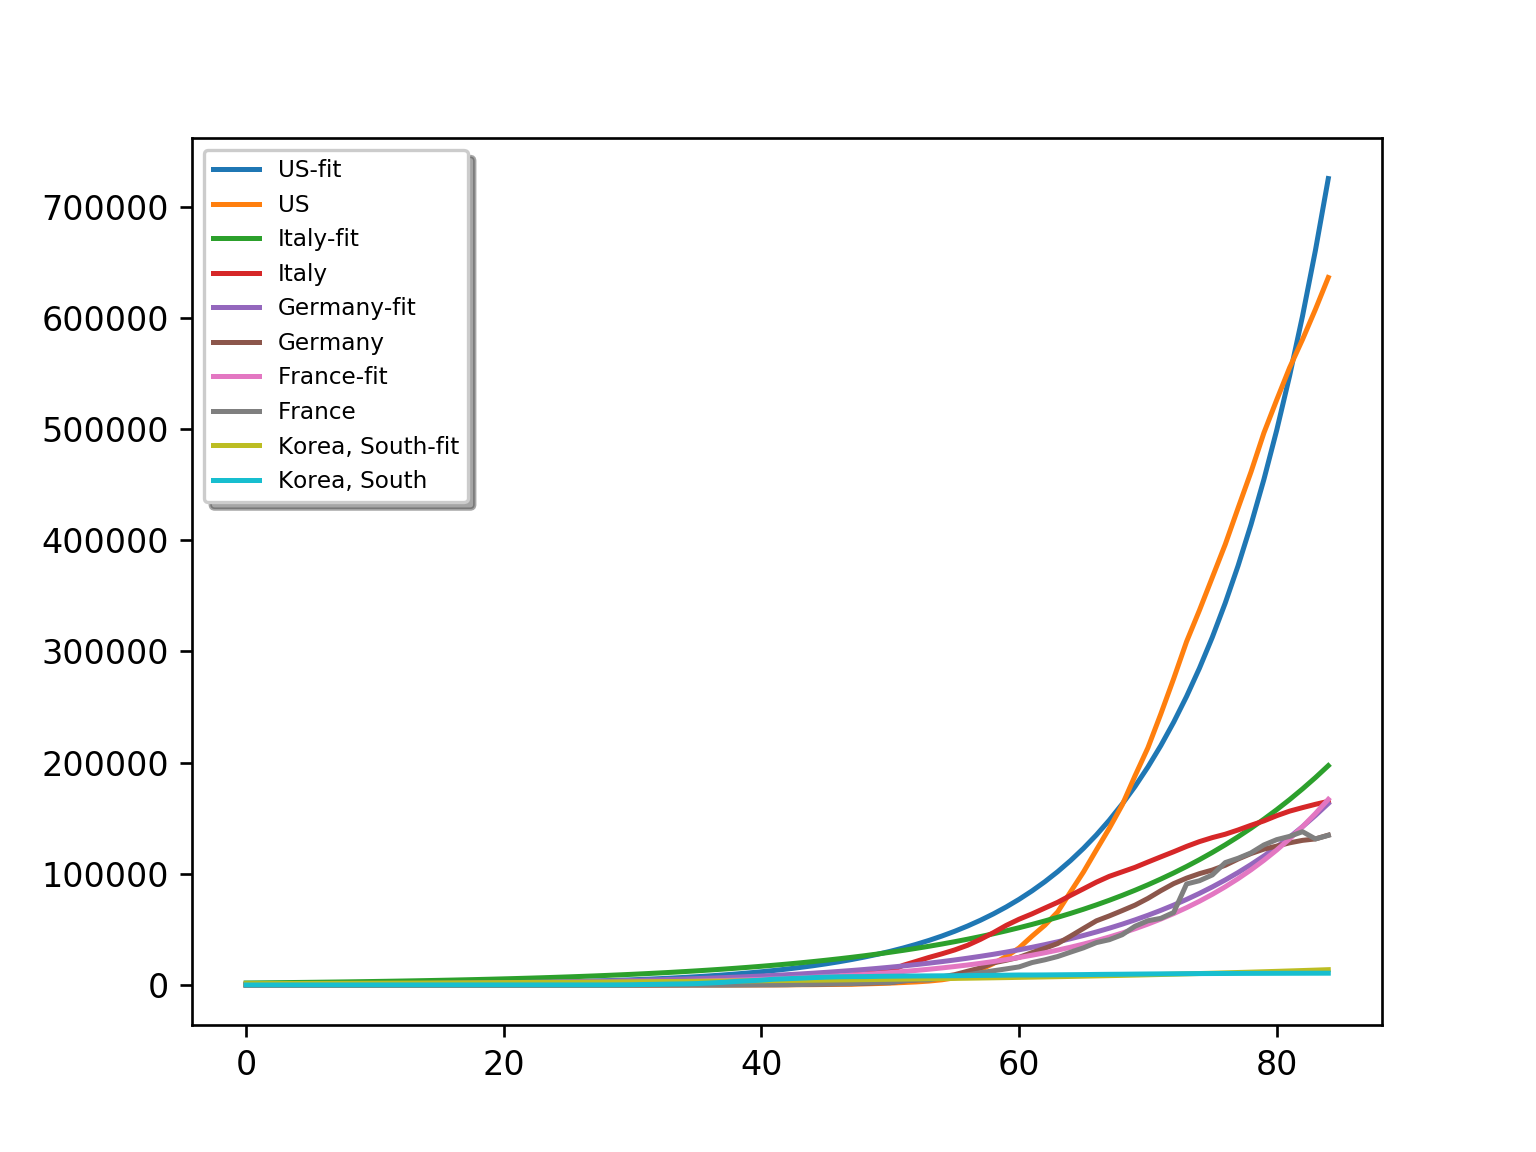

In [7]:
# Fit to the model and plotit
countries=['US','Italy','Germany','France','Korea, South']
fig, ax = plt.subplots()
for c in countries:
    xdata=np.arange(len(yC.get(c)))
    ydata=yC.get(c)
    popt,pcov = curve_fit(model,xdata,ydata)
    plt.plot()
    ax.plot(xdata,np.exp(popt[0]*(xdata-popt[1])),label=c+'-fit')
    ax.plot(xdata,ydata,label=c)
    #t=np.arange(len(yC.get('US')))
legend = ax.legend(loc='upper left', shadow=True, fontsize='x-small')

### Save the data

In [8]:
numbered=dict(zip(yC.keys(),np.arange(len(yC.keys()))))
np.save('Numbered.npy',numbered)
#

yConfirmed=np.array(list(yC.values()),dtype=float)
yDeaths=np.array(list(yD.values()),dtype=float)
yRecovered=np.array(list(yR.values()),dtype=float)
np.savez('CDR_Data.npz',yC=yConfirmed,yD=yDeaths,yR=yRecovered)

<IPython.core.display.Javascript object>


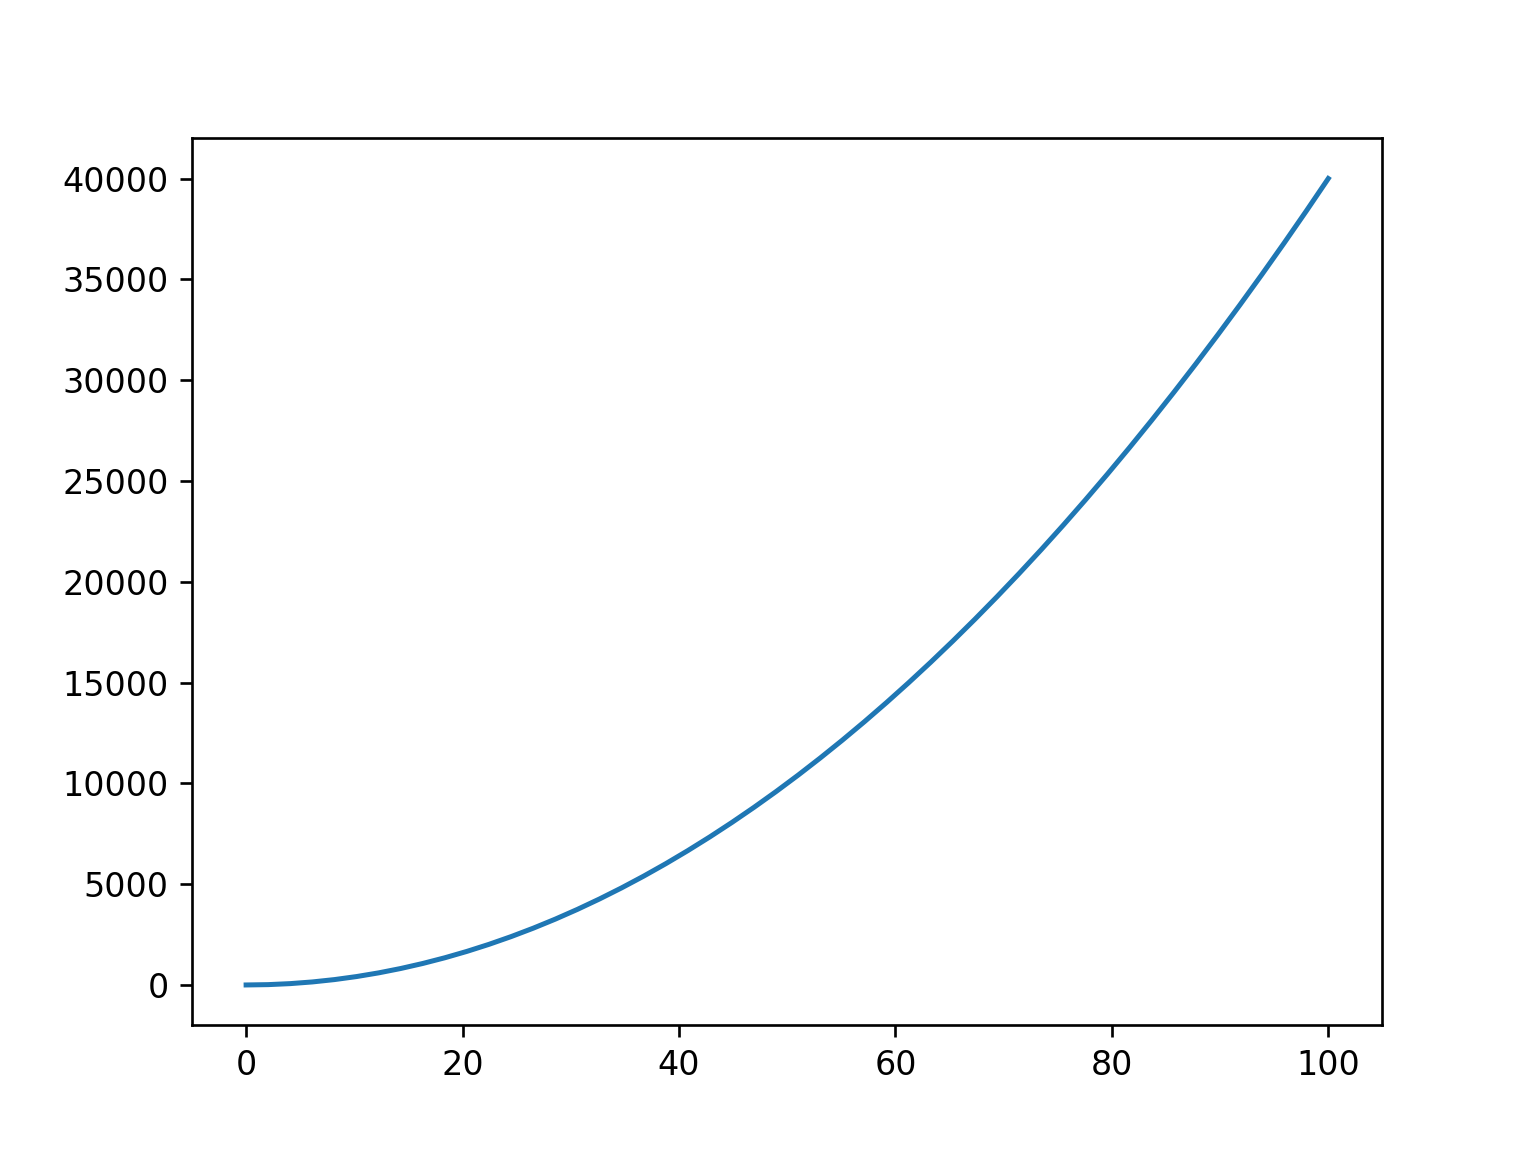

In [9]:
%matplotlib notebook
x=np.linspace(0.,100.)
c=[0.,0.,1.]
plt.plot(x,np.polynomial.hermite.hermval(x,c))